## Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
plt.rcParams['figure.figsize'] = (8,4)
plt.rcParams['figure.dpi'] = 300
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

## Importing Dataset

In [2]:
iris_data = pd.read_csv("IRIS.csv")
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Exploratory Data Analysis

In [3]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_data.shape

(150, 5)

In [5]:
iris_data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [6]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
class_counts = iris_data.groupby('species').size()
print(class_counts)

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [9]:
iris_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
iris_data[iris_data.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [11]:
iris_data = iris_data.drop_duplicates(keep="first")
iris_data = iris_data.reset_index()
iris_data = iris_data

In [12]:
iris_data = iris_data.drop(['index'],axis=1)
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
142,6.7,3.0,5.2,2.3,Iris-virginica
143,6.3,2.5,5.0,1.9,Iris-virginica
144,6.5,3.0,5.2,2.0,Iris-virginica
145,6.2,3.4,5.4,2.3,Iris-virginica


<Axes: ylabel='petal_width'>

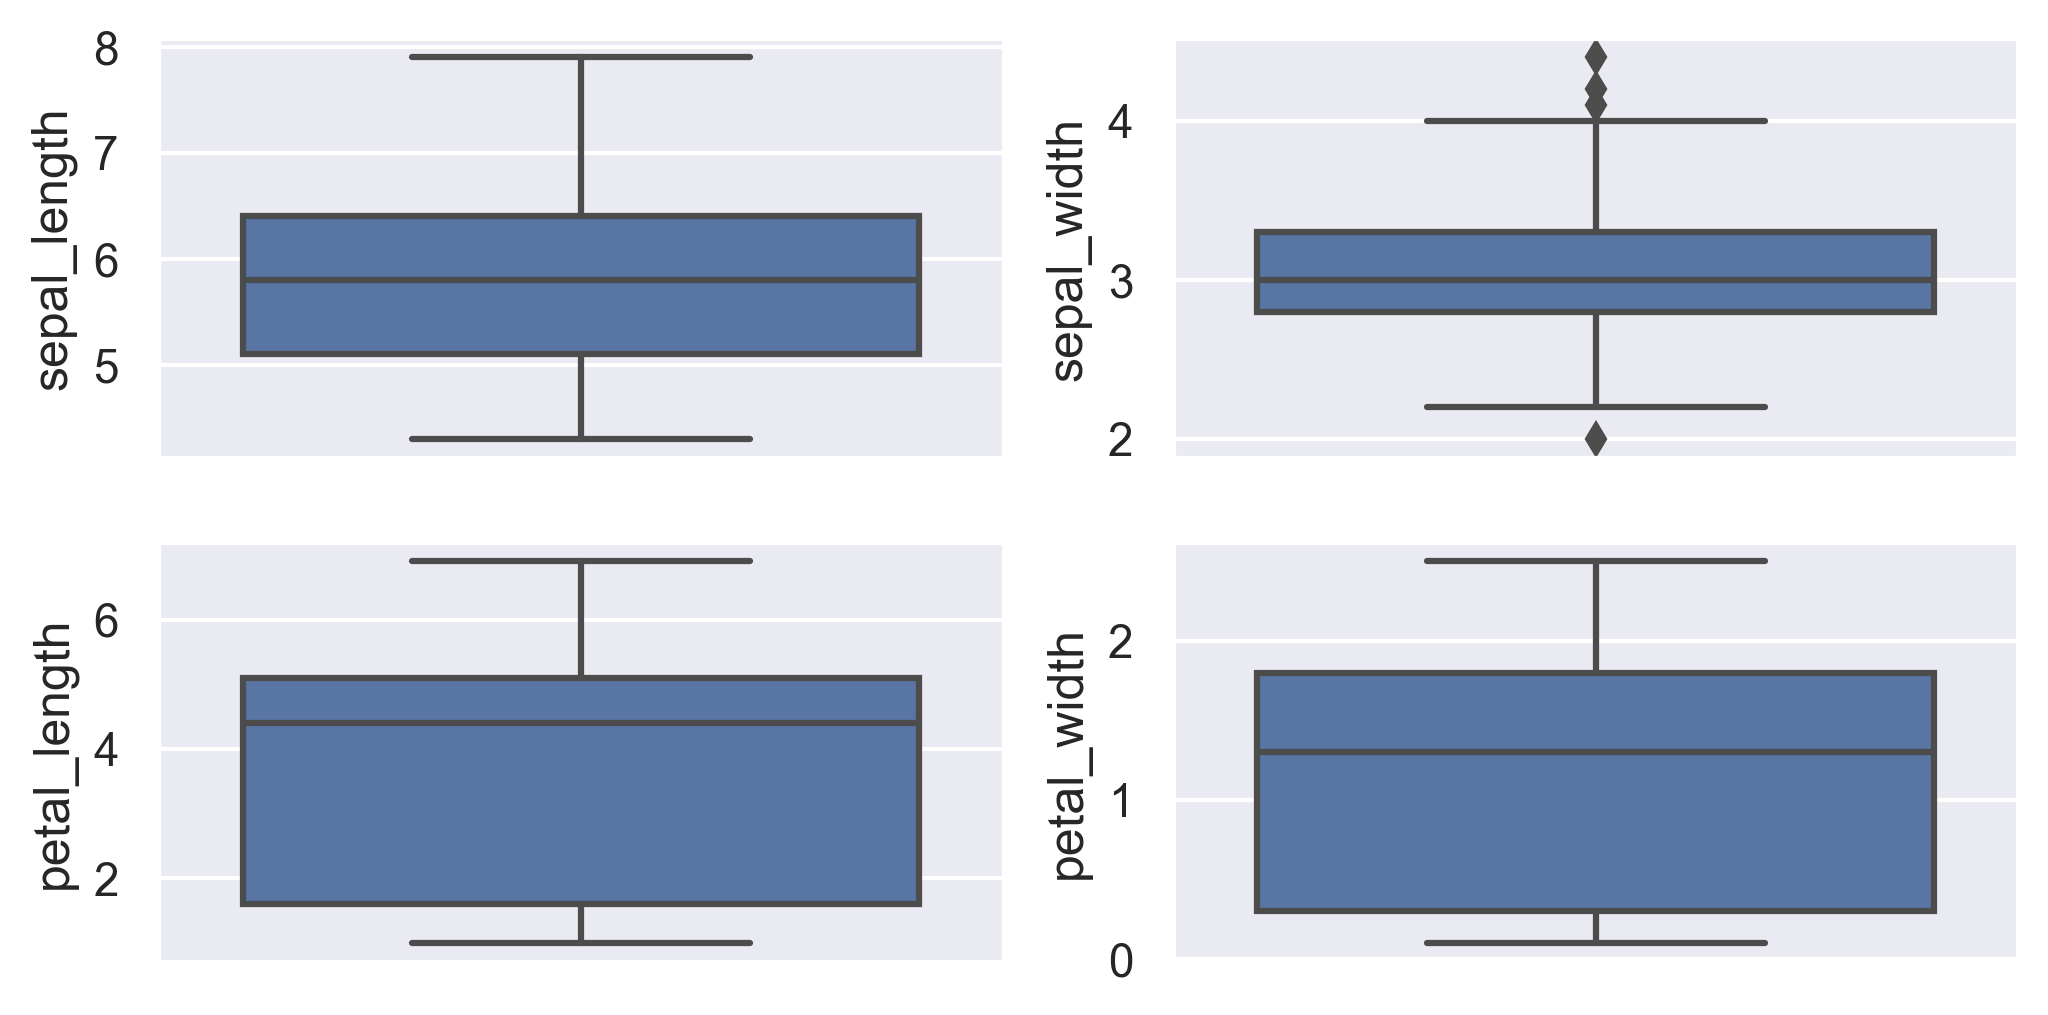

<Figure size 600x1800 with 0 Axes>

In [13]:
fig, axes = plt.subplots(2, 2)

plt.figure(figsize=(2,6))

sns.boxplot(data=iris_data,y='sepal_length', ax=axes[0,0])
sns.boxplot(data=iris_data,y='sepal_width', ax=axes[0,1])
sns.boxplot(data=iris_data,y='petal_length', ax=axes[1,0])
sns.boxplot(data=iris_data,y='petal_width', ax=axes[1,1])

<Axes: xlabel='sepal_length', ylabel='Count'>

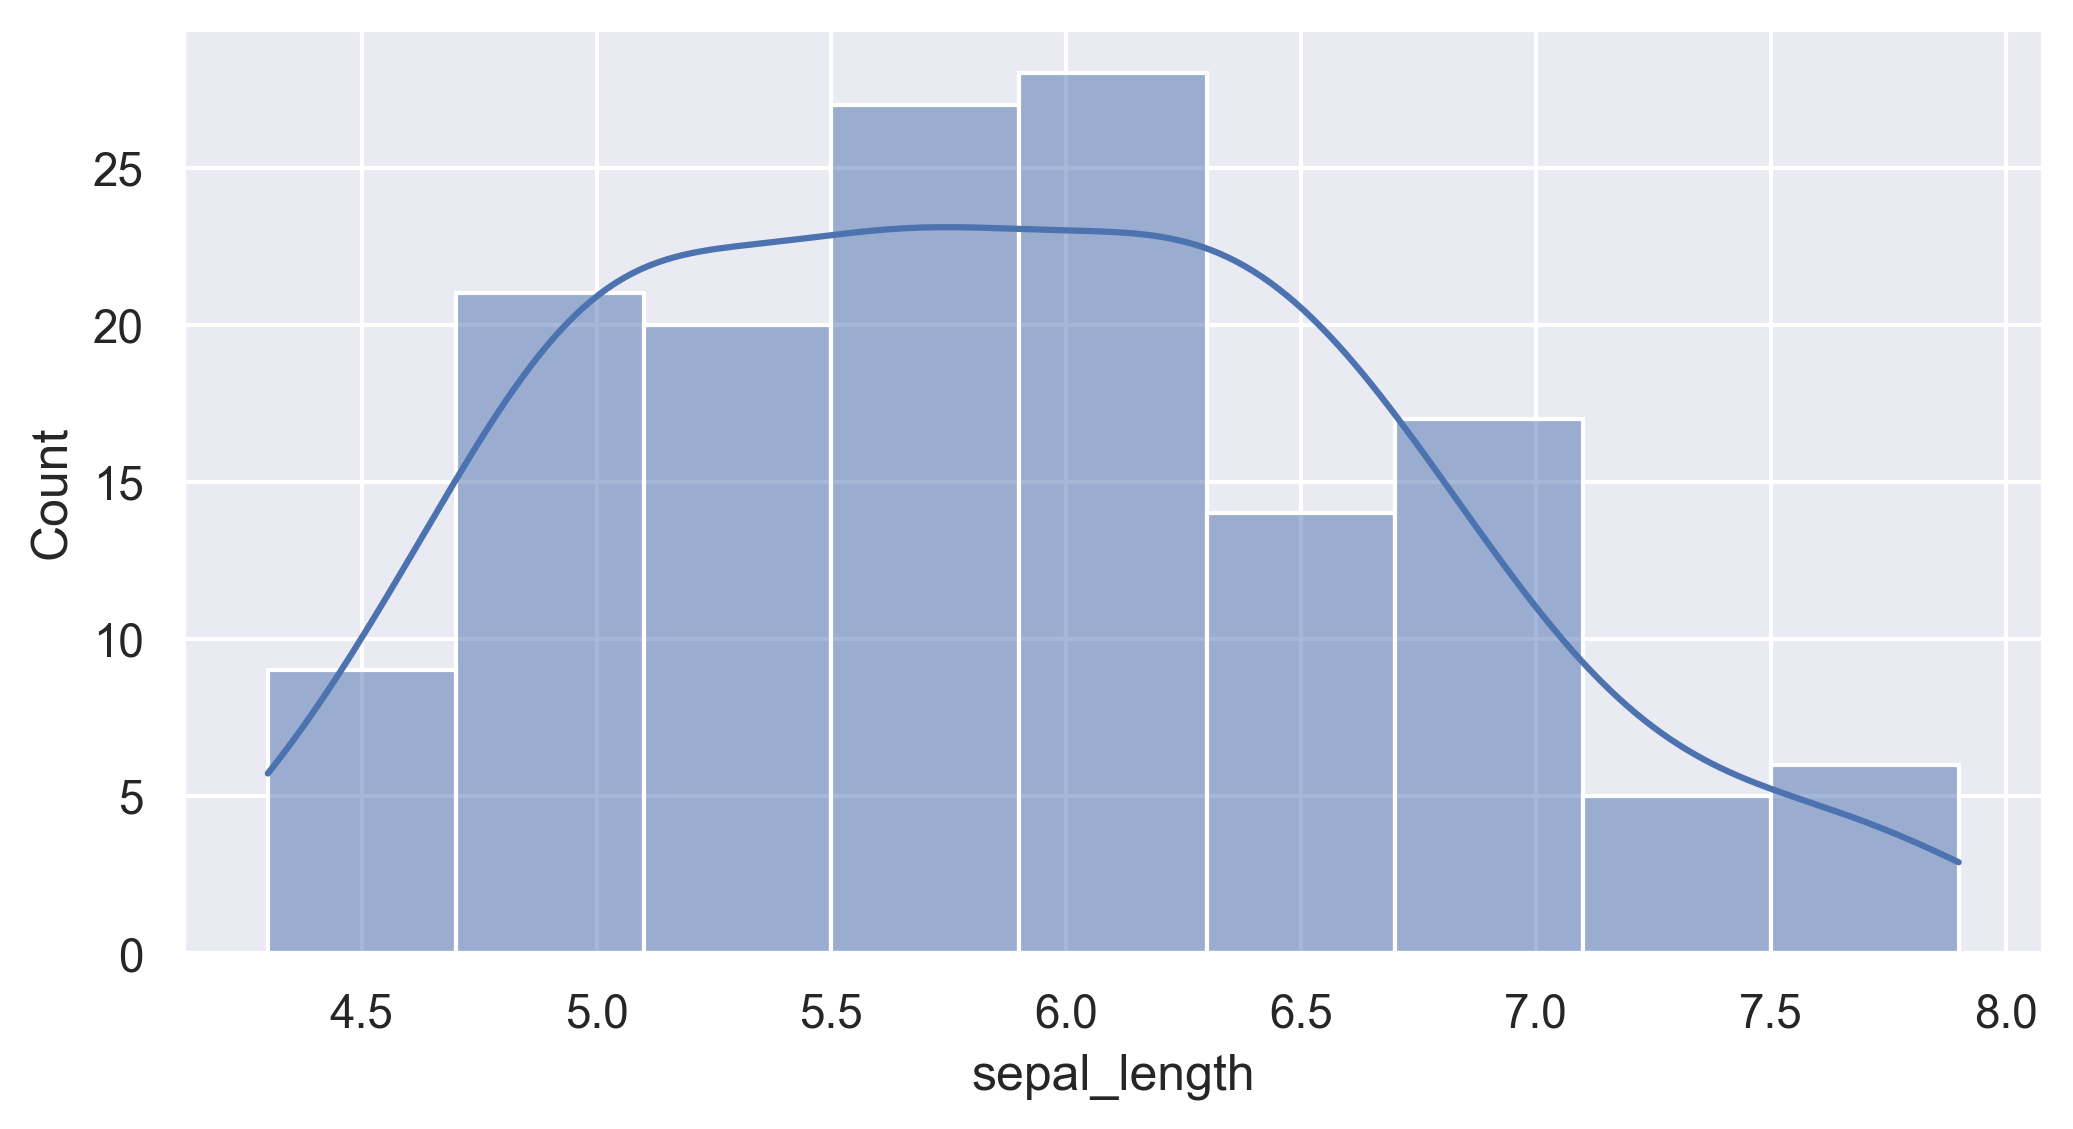

In [14]:
sns.histplot(iris_data['sepal_length'], kde=True)

<Axes: xlabel='sepal_width', ylabel='Count'>

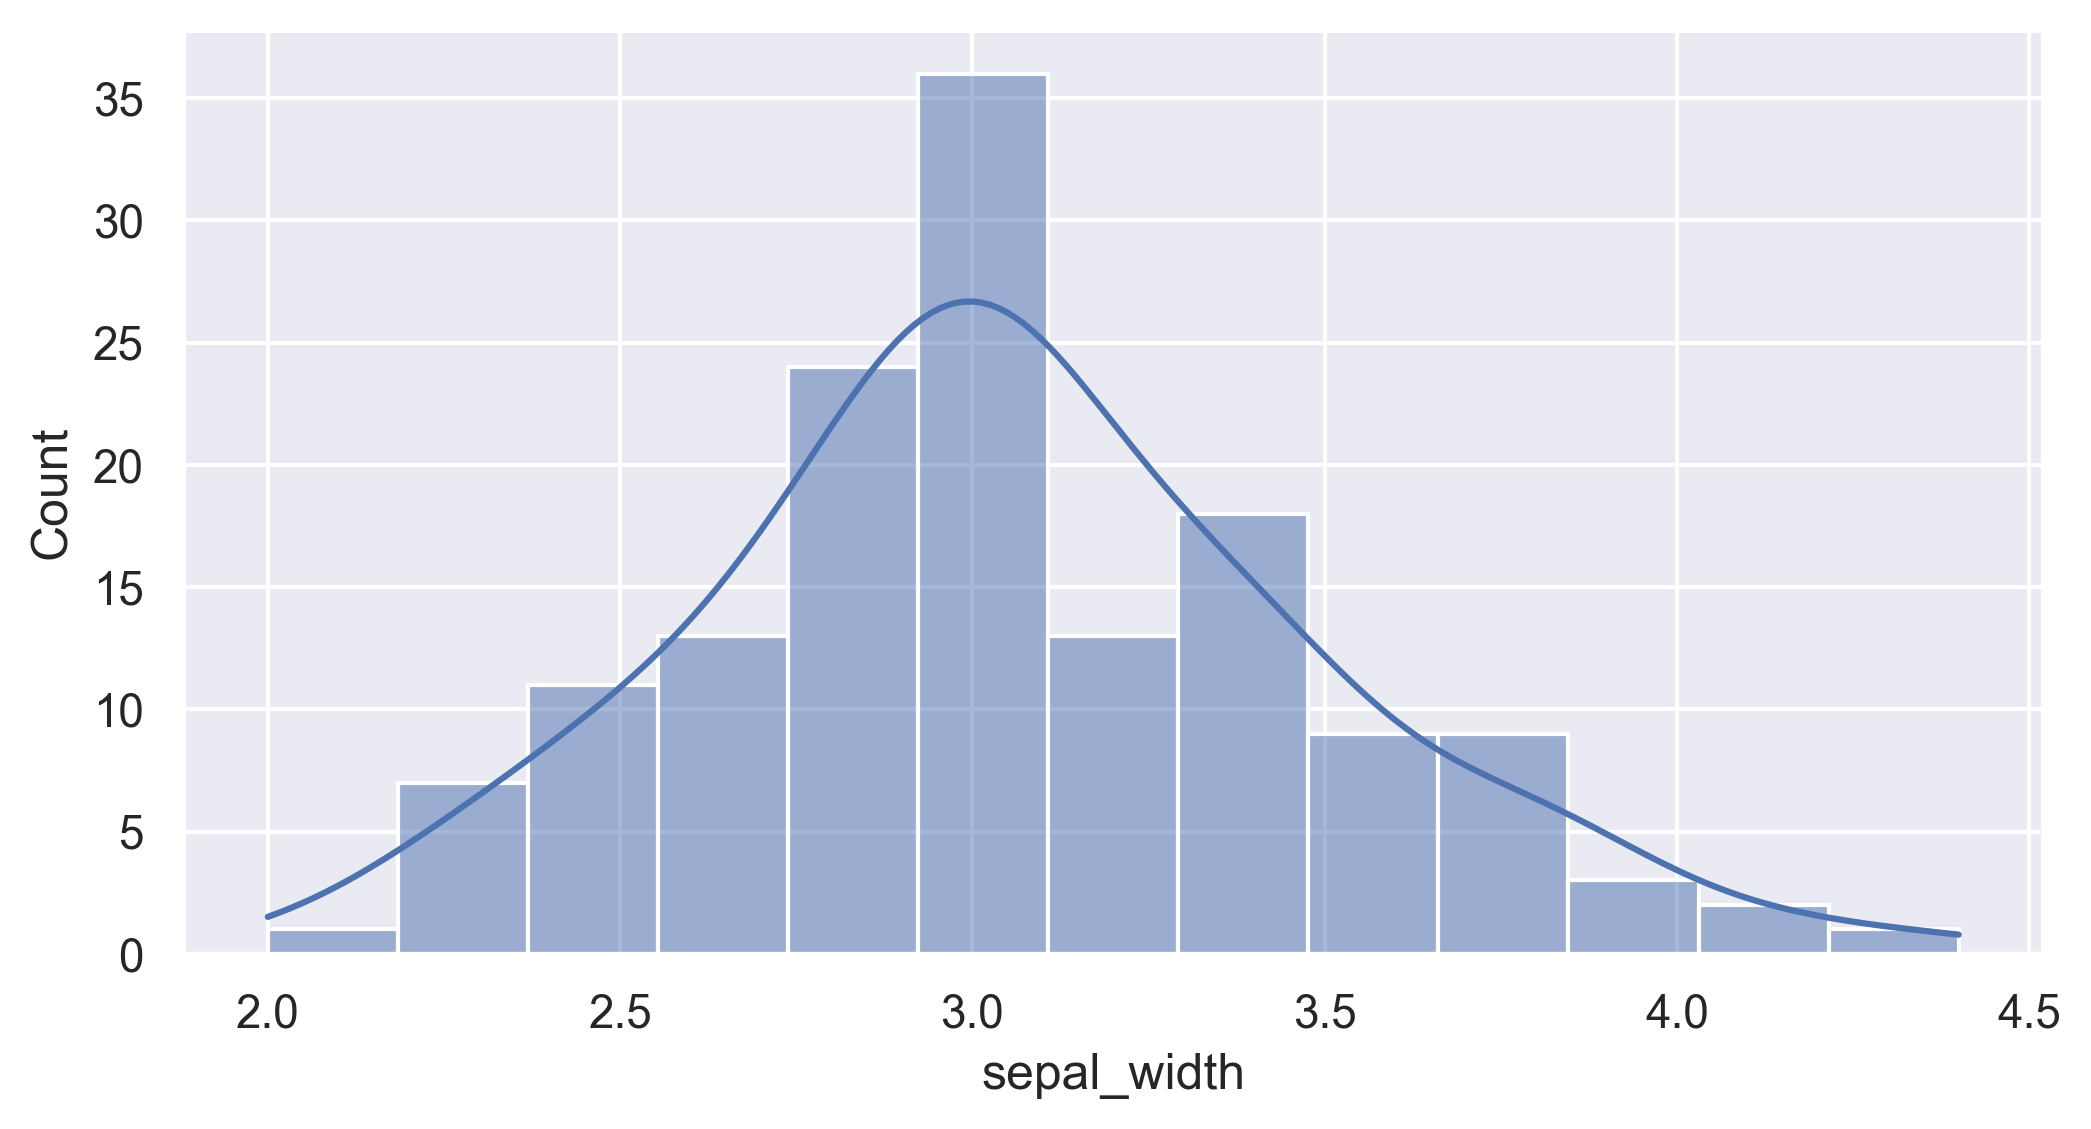

In [15]:
sns.histplot(iris_data['sepal_width'], kde=True)

<Axes: xlabel='petal_length', ylabel='Count'>

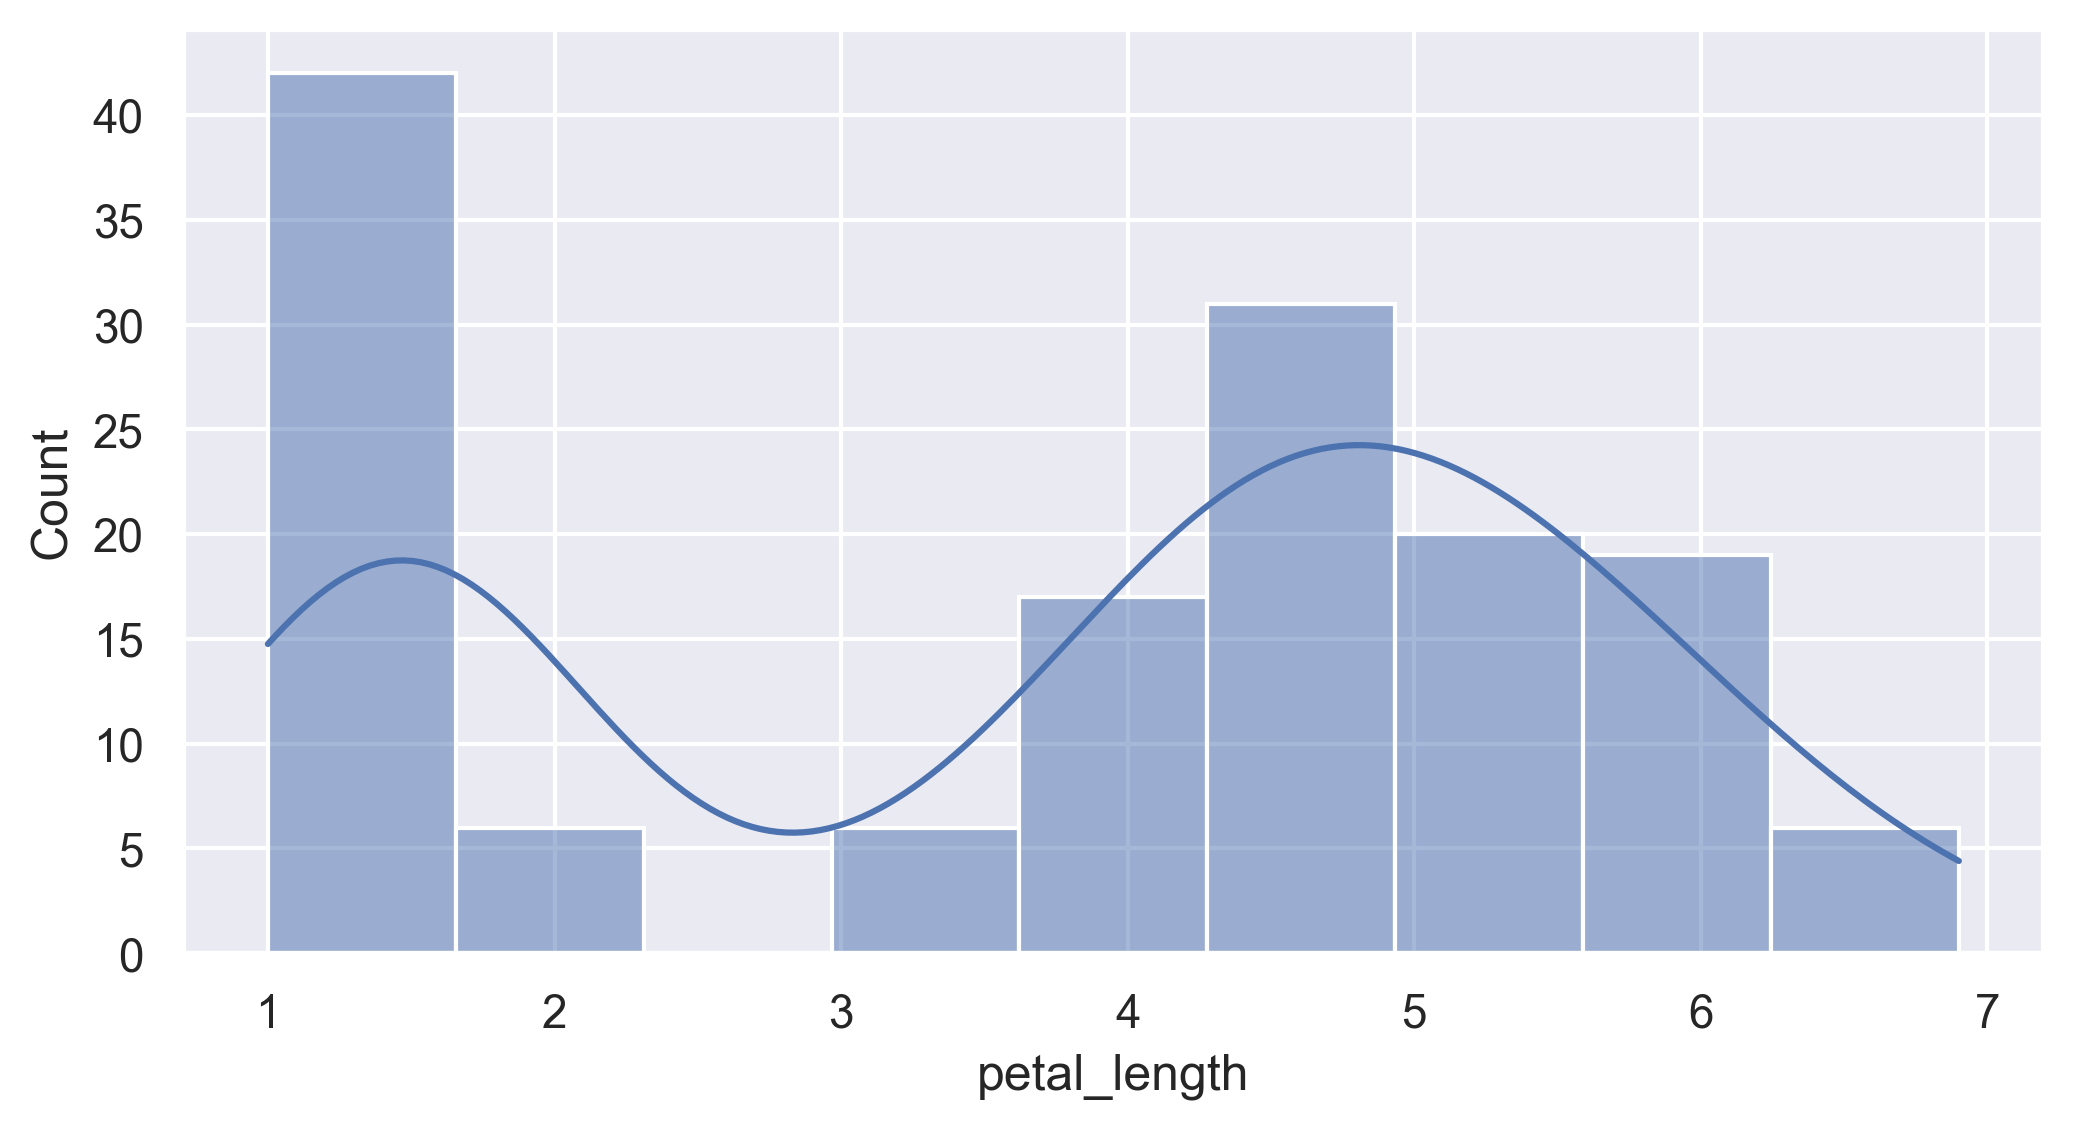

In [16]:
sns.histplot(iris_data['petal_length'], kde=True)

<Axes: xlabel='petal_width', ylabel='Count'>

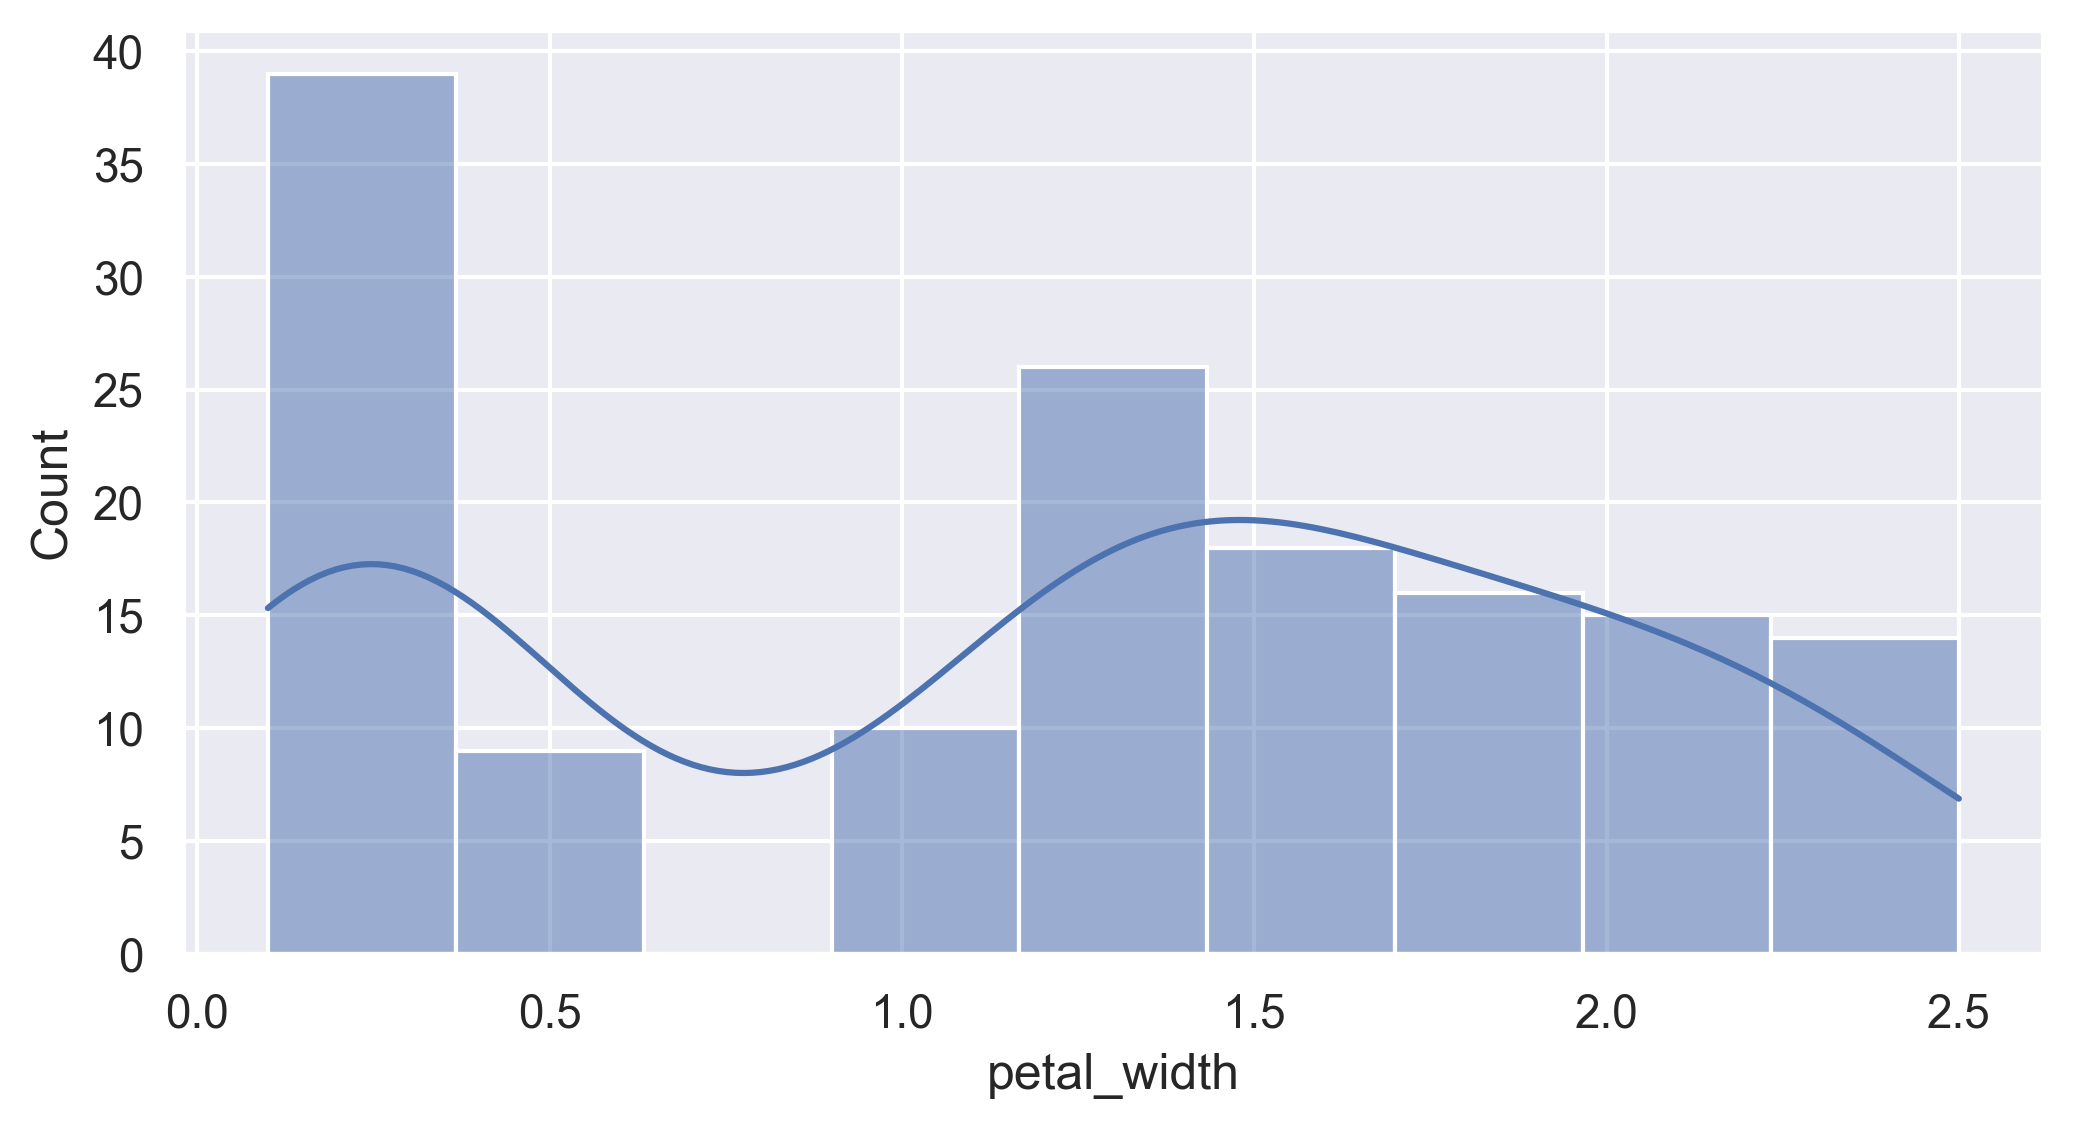

In [17]:
sns.histplot(iris_data['petal_width'], kde=True)

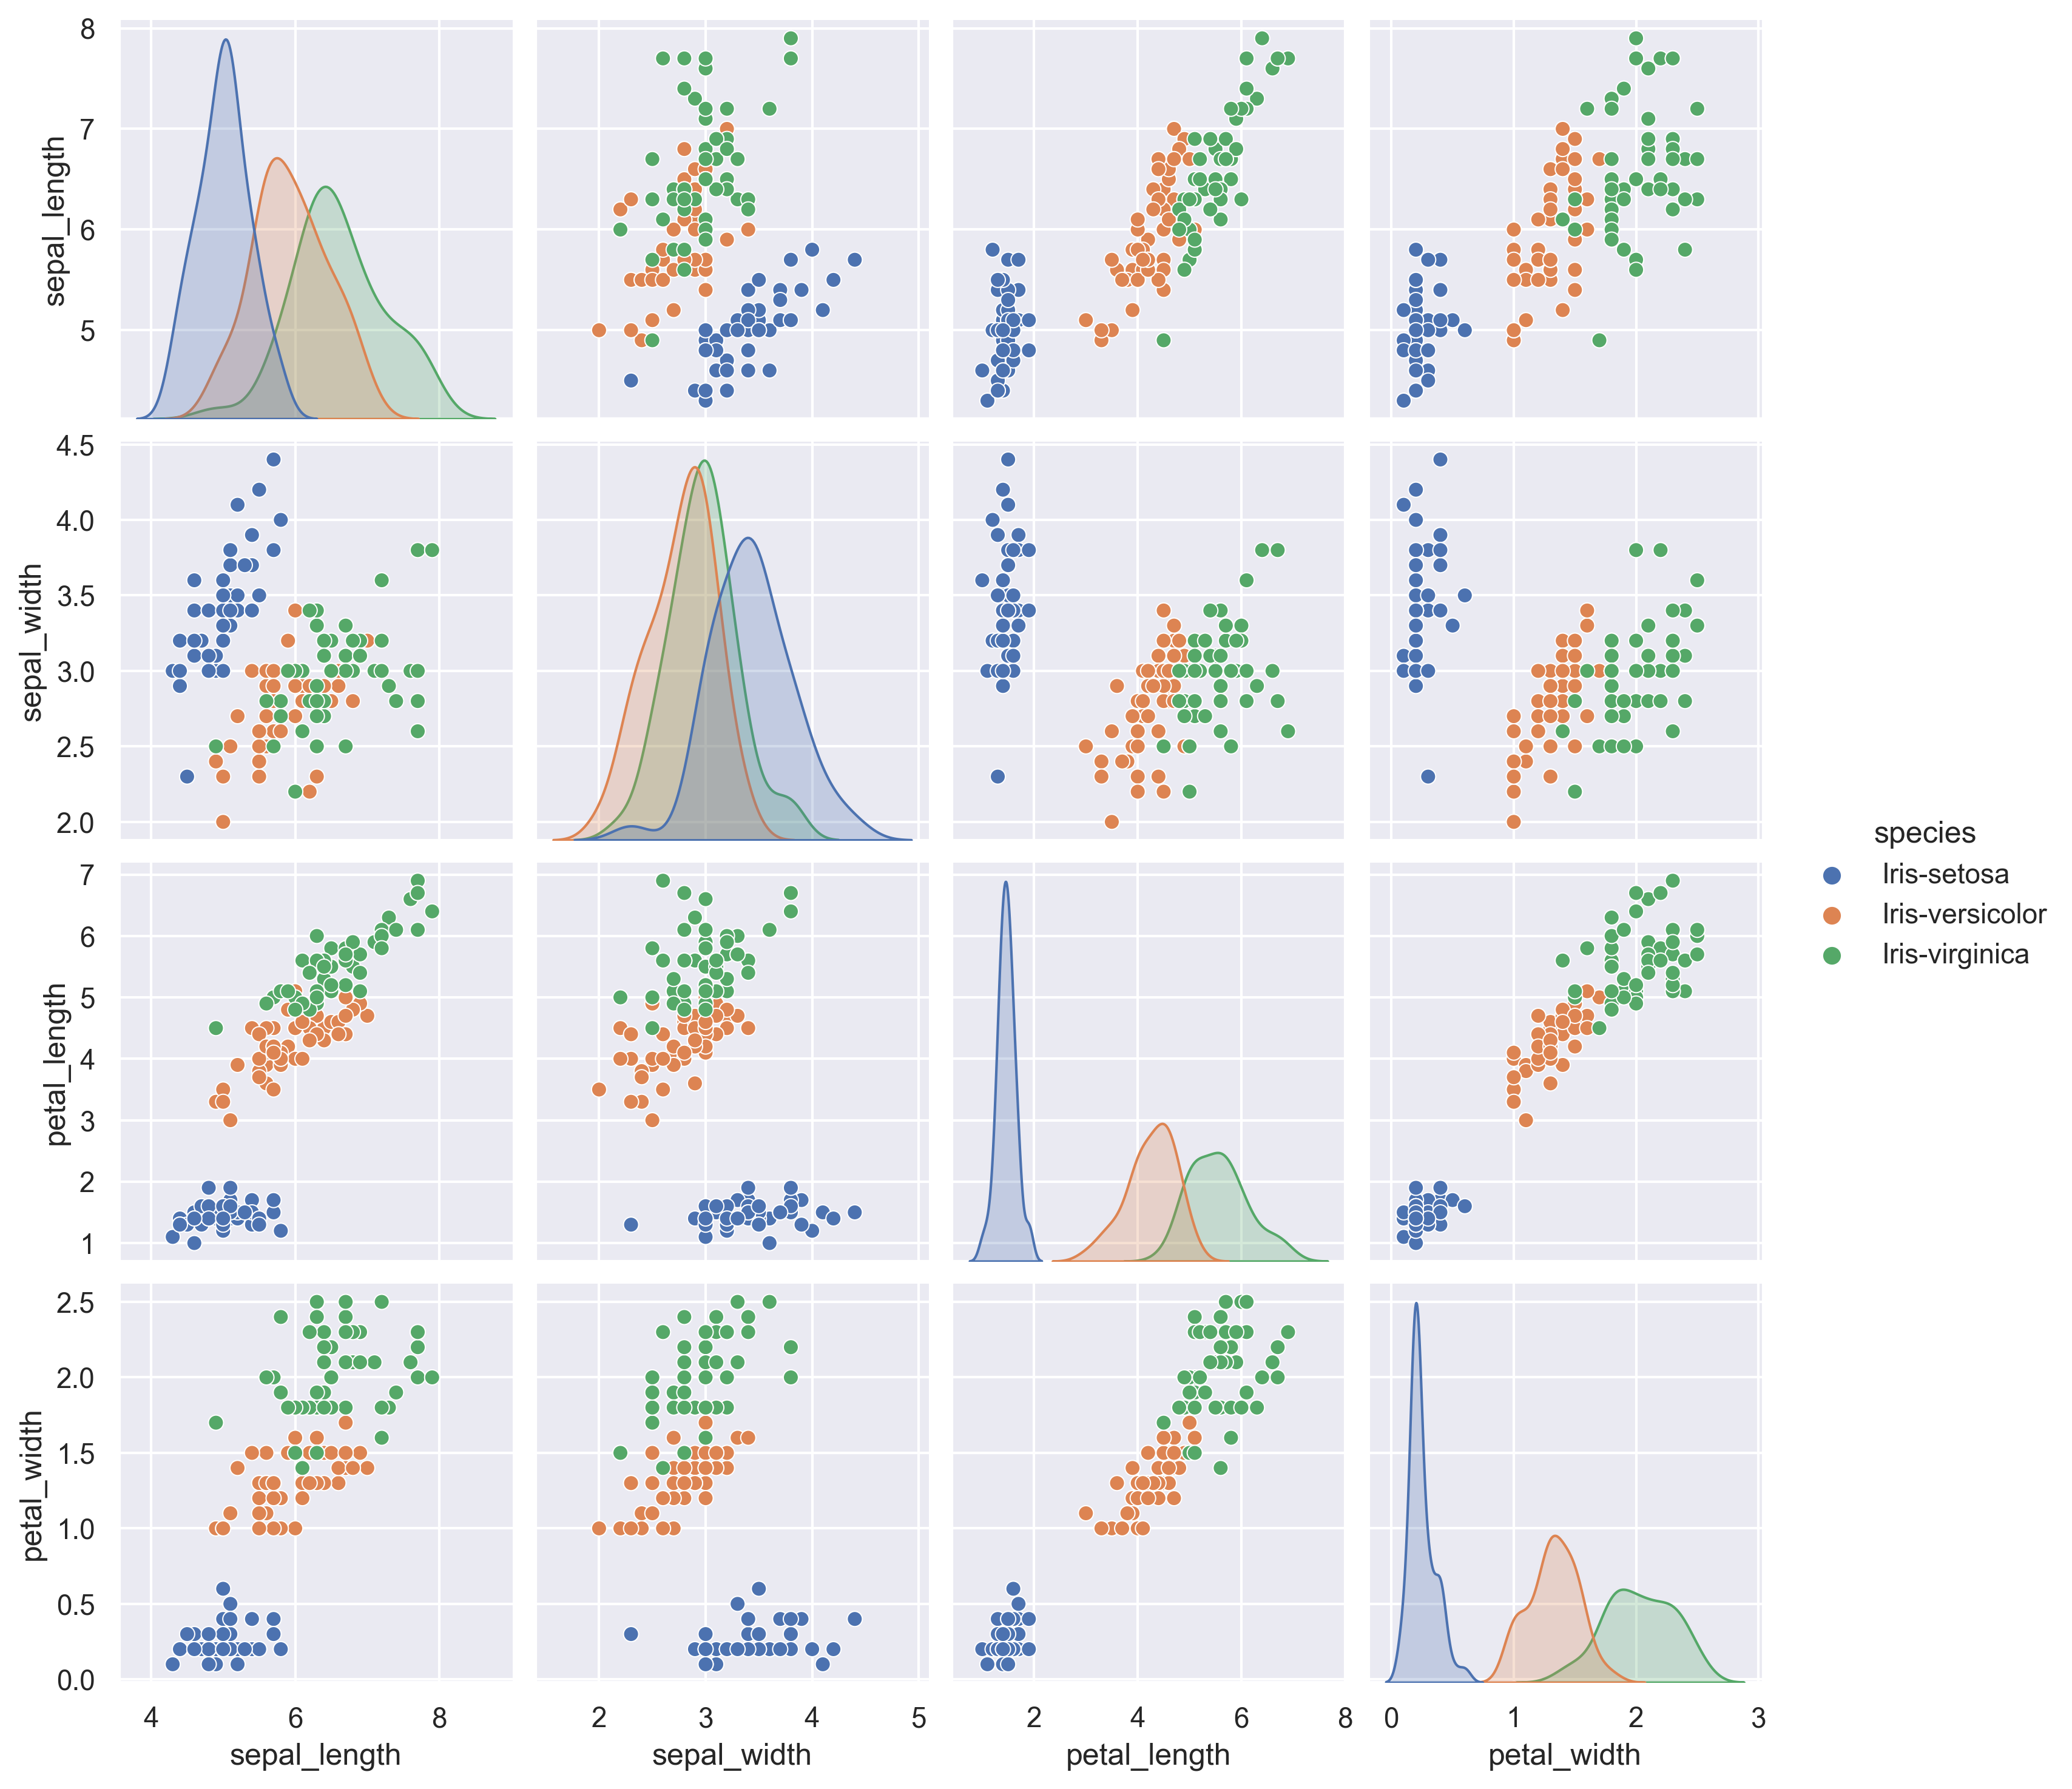

In [18]:
sns.pairplot(iris_data, hue="species")

In [19]:
corr_1 = iris_data.corr()
corr_1

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109321,0.871305,0.817058
sepal_width,-0.109321,1.000000,-0.421057,-0.356376
petal_length,0.871305,-0.421057,1.000000,0.961883
petal_width,0.817058,-0.356376,0.961883,1.000000


<Axes: >

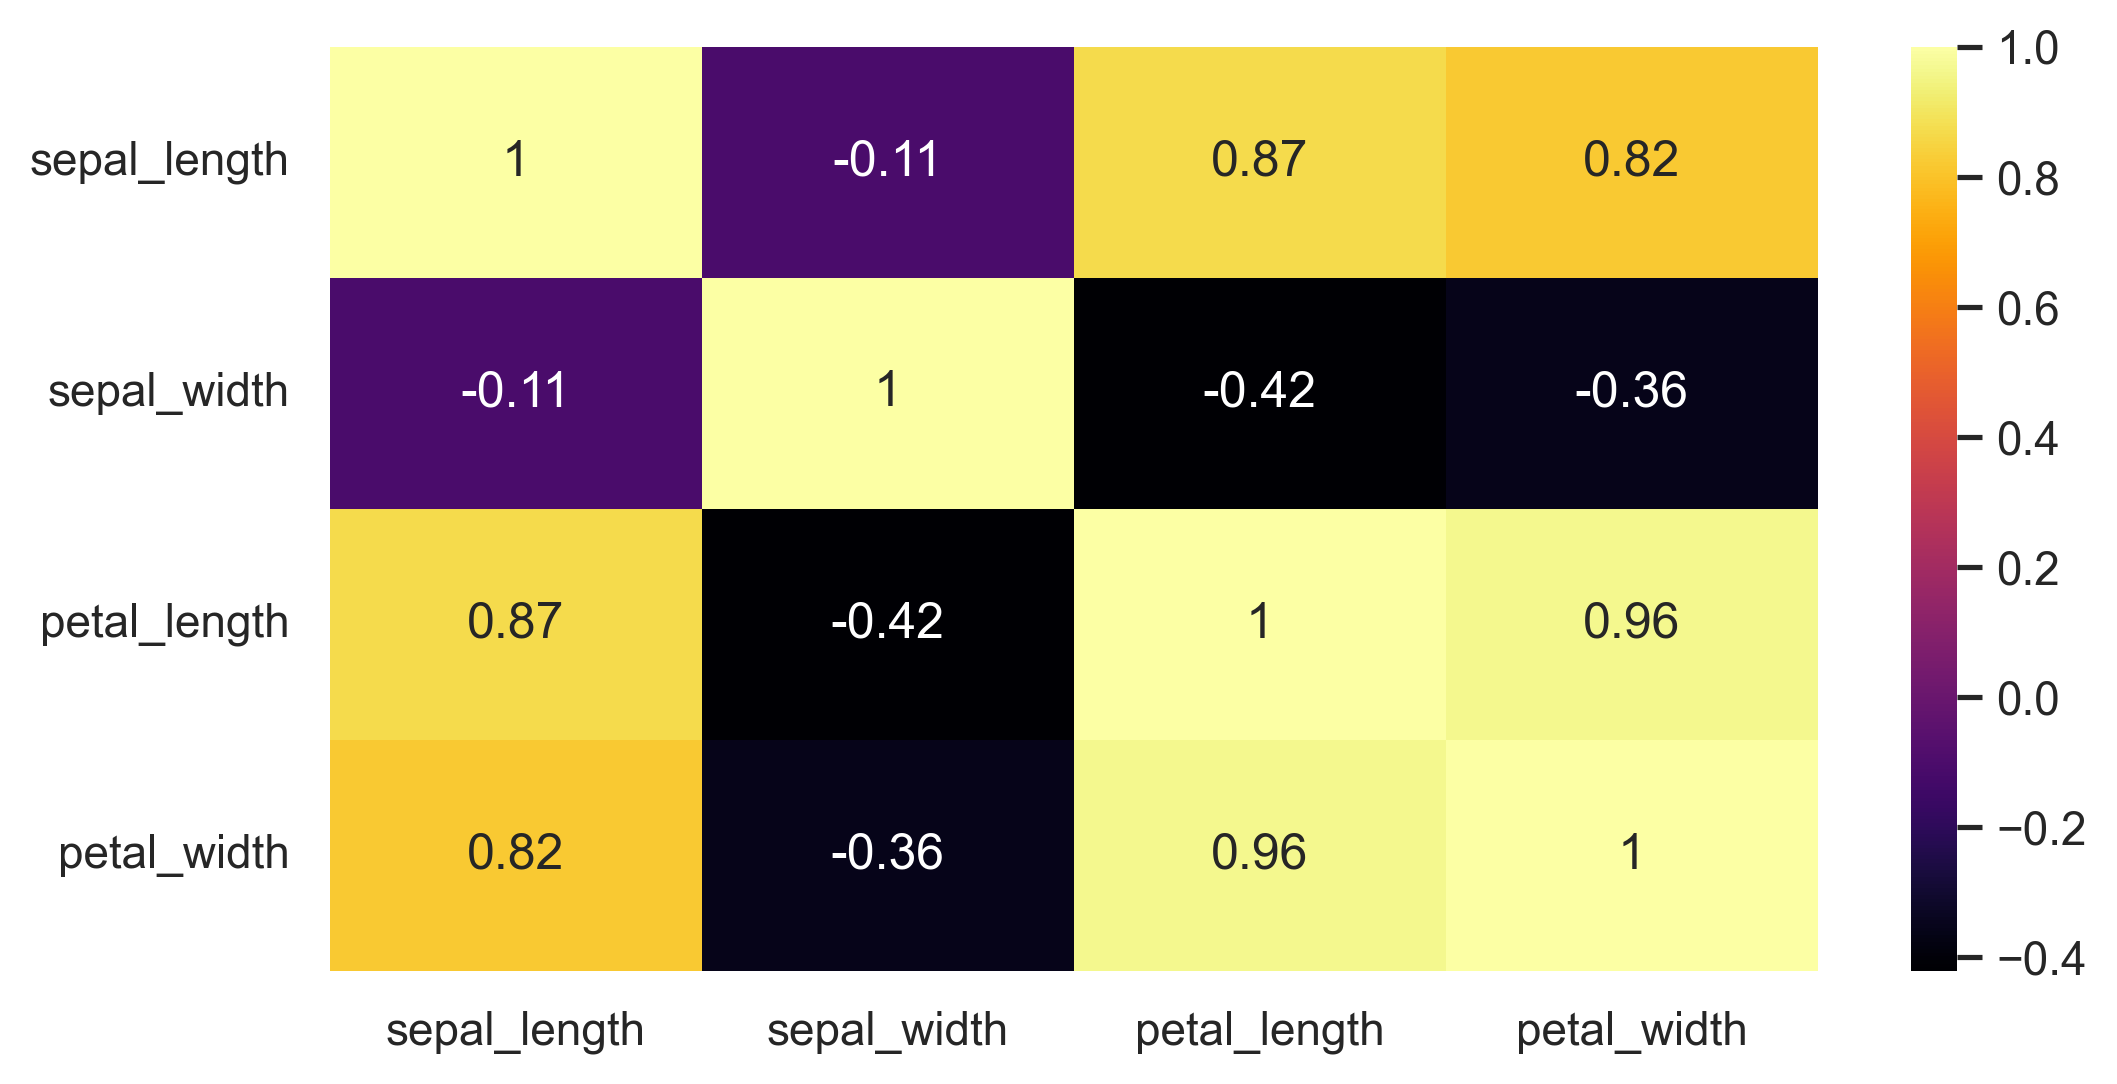

In [20]:
sns.heatmap(corr_1,annot=True,cmap="inferno")

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

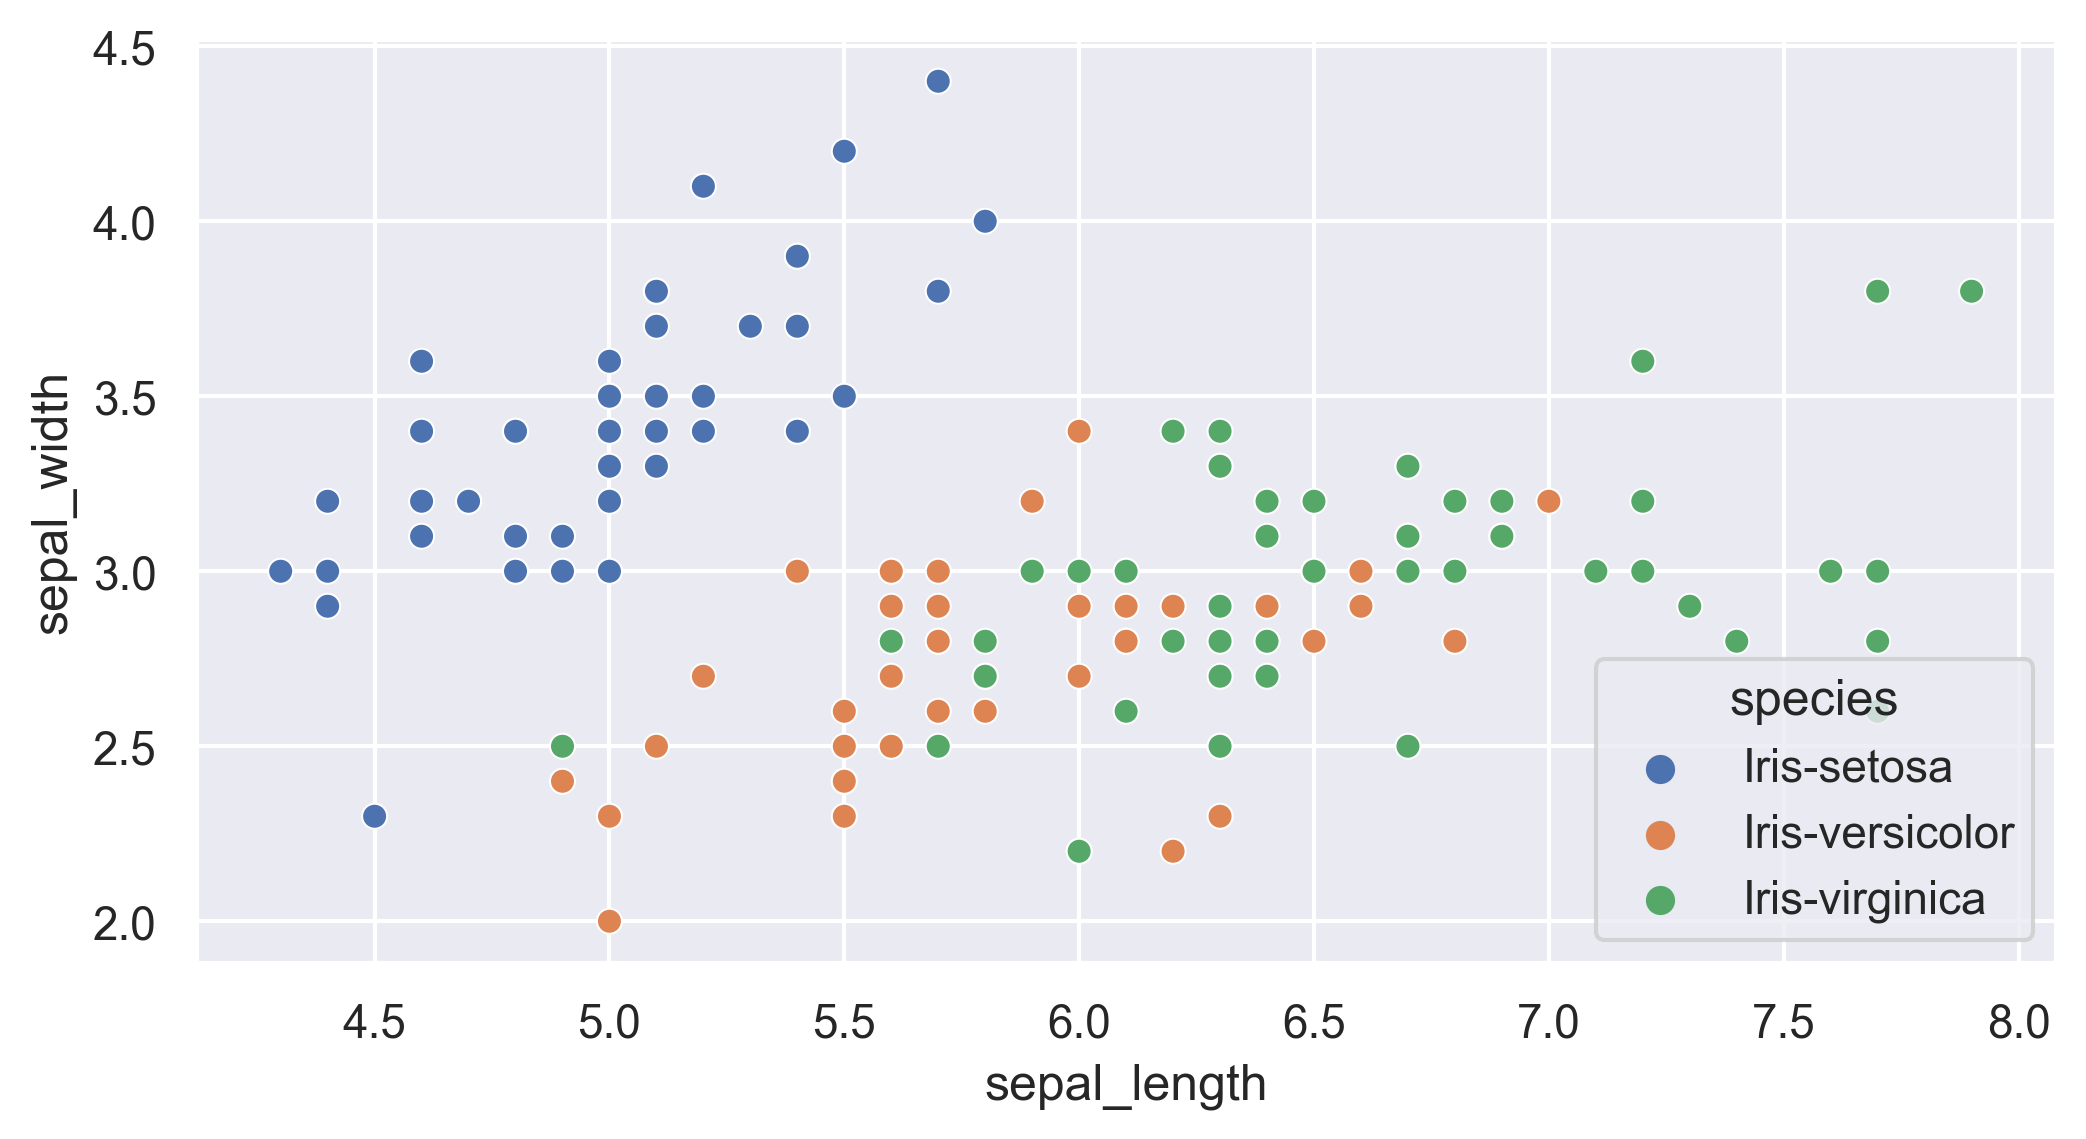

In [21]:
sns.scatterplot(x='sepal_length',y='sepal_width',data=iris_data,hue='species')

<Axes: xlabel='sepal_length', ylabel='petal_length'>

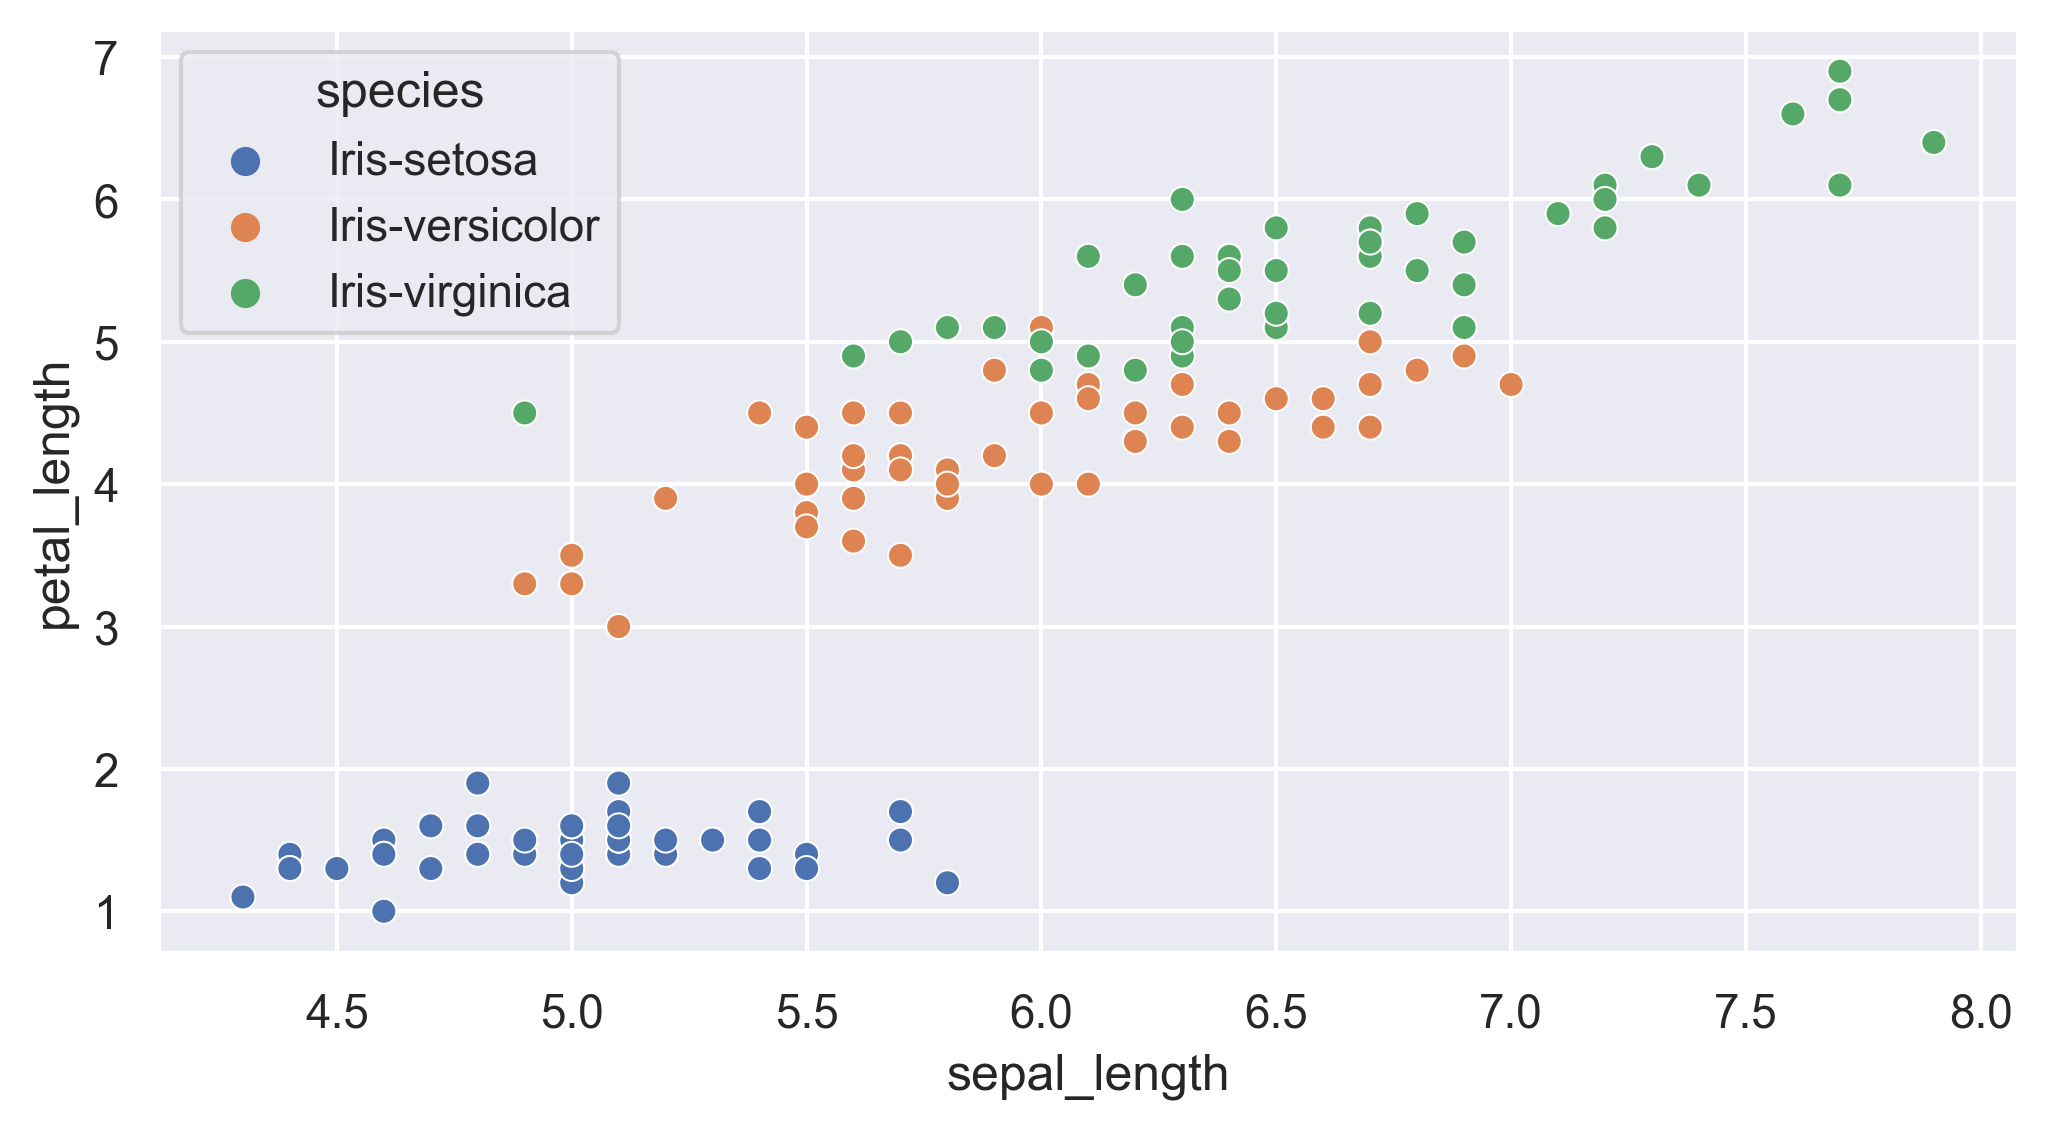

In [22]:
sns.scatterplot(x='sepal_length',y='petal_length',data=iris_data,hue='species')

<Axes: xlabel='sepal_length', ylabel='petal_width'>

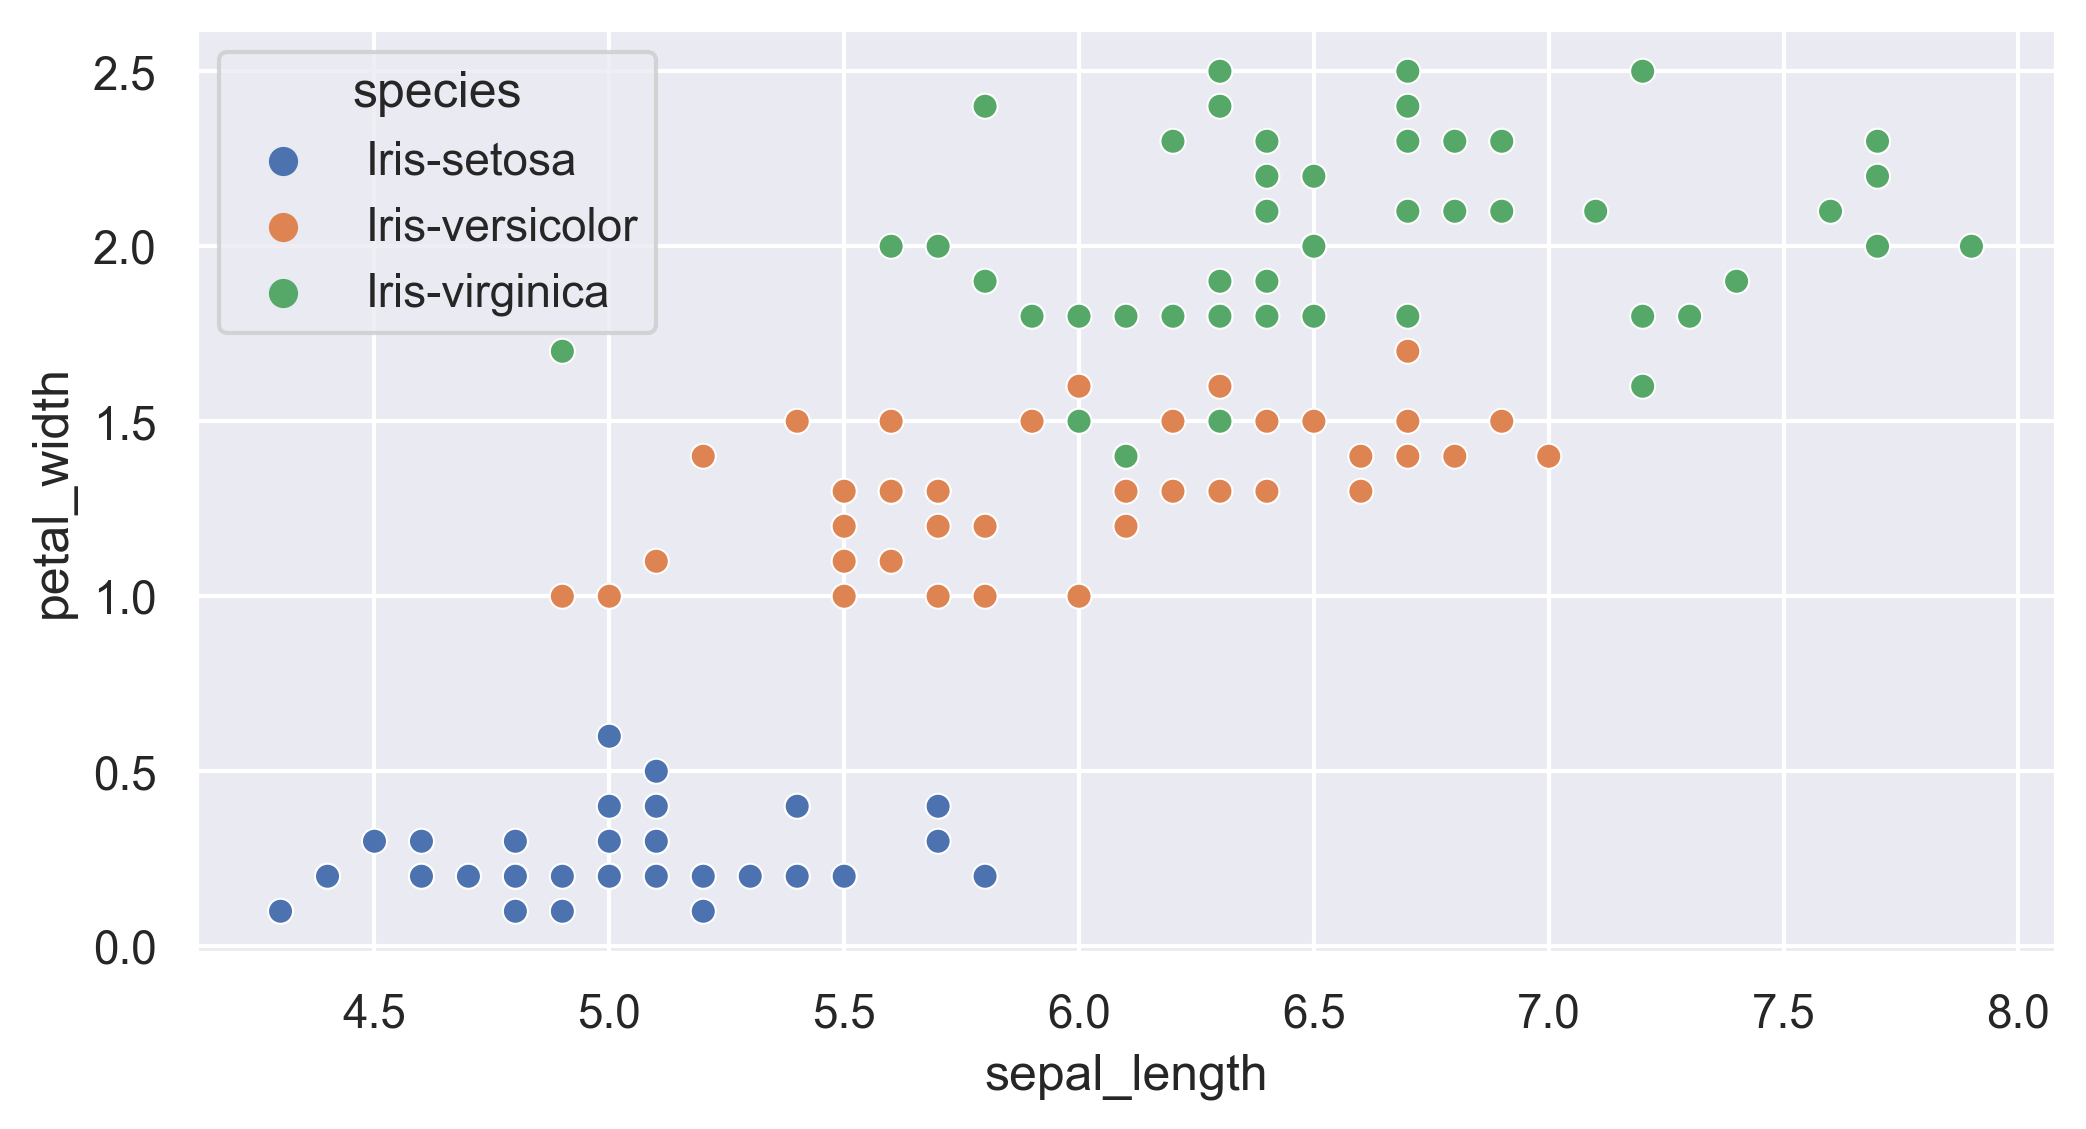

In [23]:
sns.scatterplot(x='sepal_length',y='petal_width',data=iris_data,hue='species')

## Model Building

In [24]:
le = LabelEncoder()

iris_data['species'] = le.fit_transform(iris_data['species'])
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
142,6.7,3.0,5.2,2.3,2
143,6.3,2.5,5.0,1.9,2
144,6.5,3.0,5.2,2.0,2
145,6.2,3.4,5.4,2.3,2


In [25]:
x = iris_data.iloc[:,:-1]
y = iris_data['species']

In [26]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.20,random_state=1)

## Logistic Regression

In [27]:
logistic_regression_model = LogisticRegression(random_state=42)
logistic_regression_model.fit(xtrain,ytrain)
logistic_regression_predictions = logistic_regression_model.predict(xtest)

In [28]:
logistic_regression_accuracy = accuracy_score(ytest,logistic_regression_predictions)
logistic_regression_conf_matrix = confusion_matrix(ytest,logistic_regression_predictions)
logistic_regression_classification_rep = classification_report(ytest,logistic_regression_predictions)

In [29]:
print(f"Accuracy: {logistic_regression_accuracy}")

Accuracy: 0.9333333333333333


In [30]:
print("Confusion Matrix:")
print(logistic_regression_conf_matrix)

Confusion Matrix:
[[ 9  0  0]
 [ 0 12  1]
 [ 0  1  7]]


In [31]:
print("Classification Report:")
print(logistic_regression_classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.92      0.92      0.92        13
           2       0.88      0.88      0.88         8

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



## SVM

In [32]:
svm = SVC()

svm.fit(xtrain,ytrain)
ypred= svm.predict(xtest)

In [33]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.92      0.96        13
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [34]:
svm_accuracy = (svm.score(xtrain,ytrain))
svm_accuracy

0.9743589743589743

## Naive Byes

In [35]:
GNB = GaussianNB() #continous
MNB = MultinomialNB() #discrete

In [36]:
Naive_GNB = GNB.fit(xtrain ,ytrain)
Y_pred = Naive_GNB.predict(xtest)
Y_pred

array([2, 1, 2, 2, 2, 2, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 2, 2, 0, 1, 1, 2, 2])

In [37]:
confusion_matrix(ytest, Y_pred)

array([[ 9,  0,  0],
       [ 0, 11,  2],
       [ 0,  1,  7]], dtype=int64)

In [38]:
GNB_accuracy = accuracy_score(ytest , Y_pred)
GNB_accuracy

0.9

In [39]:
print(classification_report(ytest,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.92      0.85      0.88        13
           2       0.78      0.88      0.82         8

    accuracy                           0.90        30
   macro avg       0.90      0.91      0.90        30
weighted avg       0.90      0.90      0.90        30



In [40]:
Naive_MNB = MNB.fit(xtrain ,ytrain)
Y__pred = Naive_MNB.predict(xtest)
Y__pred

array([2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 1,
       0, 2, 2, 0, 2, 1, 2, 2])

In [41]:
confusion_matrix(ytest, Y__pred)

array([[9, 0, 0],
       [0, 5, 8],
       [0, 0, 8]], dtype=int64)

In [42]:
MNB_accuracy = accuracy_score(ytest , Y__pred)
MNB_accuracy

0.7333333333333333

In [43]:
print(classification_report(ytest,Y__pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.38      0.56        13
           2       0.50      1.00      0.67         8

    accuracy                           0.73        30
   macro avg       0.83      0.79      0.74        30
weighted avg       0.87      0.73      0.72        30



## Decision Trees

[Text(0.375, 0.875, 'x[3] <= 0.8\nentropy = 1.584\nsamples = 117\nvalue = [39, 37, 41]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.5, 0.625, 'x[3] <= 1.65\nentropy = 0.998\nsamples = 78\nvalue = [0, 37, 41]'),
 Text(0.25, 0.375, 'x[2] <= 5.0\nentropy = 0.391\nsamples = 39\nvalue = [0, 36, 3]'),
 Text(0.125, 0.125, 'entropy = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(0.375, 0.125, 'entropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.75, 0.375, 'x[2] <= 4.85\nentropy = 0.172\nsamples = 39\nvalue = [0, 1, 38]'),
 Text(0.625, 0.125, 'entropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 35\nvalue = [0, 0, 35]')]

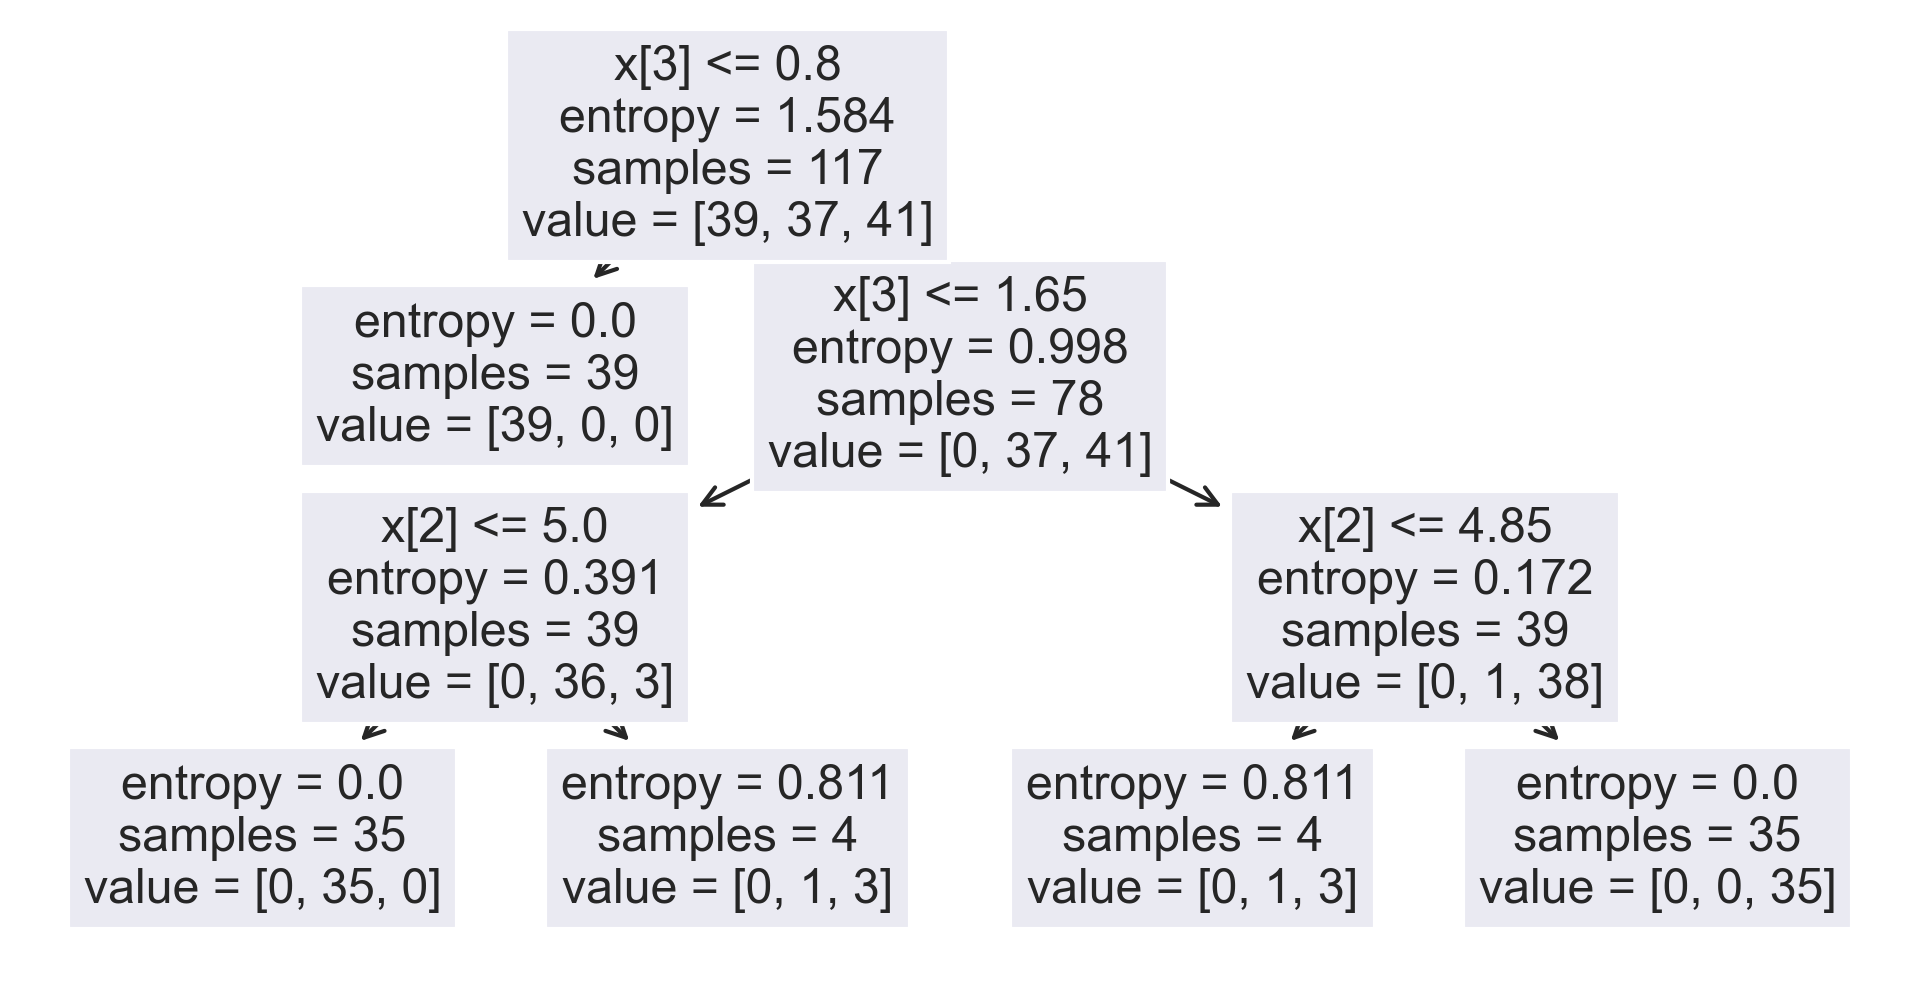

In [44]:
model1 = DecisionTreeClassifier(criterion='entropy',max_depth=3) 
model1.fit(xtrain,ytrain)
tree.plot_tree(model1)

[Text(0.375, 0.875, 'petal_width <= 0.8\nentropy = 1.584\nsamples = 117\nvalue = [39, 37, 41]\nclass = Iris-virginica'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 39\nvalue = [39, 0, 0]\nclass = Iris-setosa'),
 Text(0.5, 0.625, 'petal_width <= 1.65\nentropy = 0.998\nsamples = 78\nvalue = [0, 37, 41]\nclass = Iris-virginica'),
 Text(0.25, 0.375, 'petal_length <= 5.0\nentropy = 0.391\nsamples = 39\nvalue = [0, 36, 3]\nclass = Iris-versicolor'),
 Text(0.125, 0.125, 'entropy = 0.0\nsamples = 35\nvalue = [0, 35, 0]\nclass = Iris-versicolor'),
 Text(0.375, 0.125, 'entropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]\nclass = Iris-virginica'),
 Text(0.75, 0.375, 'petal_length <= 4.85\nentropy = 0.172\nsamples = 39\nvalue = [0, 1, 38]\nclass = Iris-virginica'),
 Text(0.625, 0.125, 'entropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]\nclass = Iris-virginica'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 35\nvalue = [0, 0, 35]\nclass = Iris-virginica')]

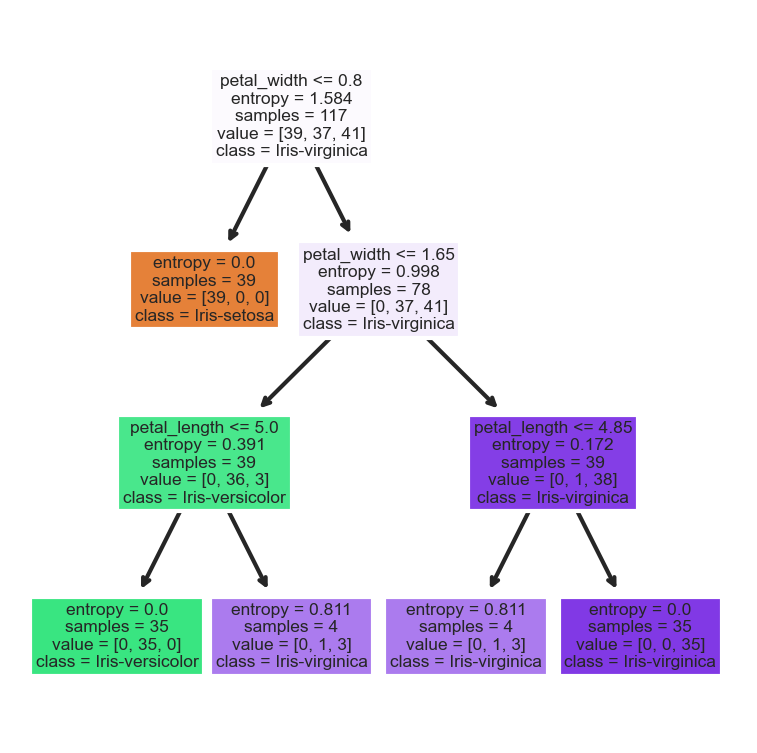

In [45]:
factor=['sepal_length', 'sepal_width', 'petal_length','petal_width']
result=['Iris-setosa','Iris-versicolor','Iris-virginica']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(3,3),dpi=300)
tree.plot_tree(model1,
               feature_names=factor,
               class_names=result,
               filled=True)

In [46]:
dt_preds=model1.predict(xtest)
pd.Series(dt_preds).value_counts()

1    13
0     9
2     8
dtype: int64

In [47]:
dt_preds

array([2, 1, 1, 2, 2, 2, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 2, 2, 0, 1, 1, 2, 2])

In [48]:
pd.crosstab(ytest,dt_preds)

col_0,0,1,2
species,,,
0,9,0,0
1,0,12,1
2,0,1,7


In [49]:
dt_accuracy = np.mean(dt_preds==ytest) #checking accuracy
dt_accuracy

0.9333333333333333

In [50]:
model1.score(xtest,ytest) #automates the prediction

0.9333333333333333

## Comparing Accuracies

In [51]:
logistic_regression_accuracy
svm_accuracy
GNB_accuracy
MNB_accuracy
dt_accuracy

0.9333333333333333

In [52]:
data = {'Model': ['Logistic Regression', 'Support Vector Machines', 'Gaussian NB',"Multinomial NB",'Decision Trees'],
        'Accuracies': [logistic_regression_accuracy, svm_accuracy, GNB_accuracy,MNB_accuracy,dt_accuracy],}
accuracy_table = pd.DataFrame(data)

In [53]:
print(accuracy_table)

                     Model  Accuracies
0      Logistic Regression    0.933333
1  Support Vector Machines    0.974359
2              Gaussian NB    0.900000
3           Multinomial NB    0.733333
4           Decision Trees    0.933333
